In [240]:
import pandas as pd
import numpy as np
import seaborn as sns

---

In [241]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- 아래와 같은 사용자 정의 함수를 만들어보자
- 해당 함수를 df의 transform에도 사용할 것이며, groupby의 agg,aggregate,apply에도 사용할 것이다.

In [242]:
def f(x): 
    return x+10

In [243]:
titanic_df.groupby(['Sex'])['Fare'].apply(f)

0      17.2500
1      81.2833
2      17.9250
3      63.1000
4      18.0500
        ...   
886    23.0000
887    40.0000
888    33.4500
889    40.0000
890    17.7500
Name: Fare, Length: 891, dtype: float64

In [244]:
titanic_df['Fare'].transform(f)

0      17.2500
1      81.2833
2      17.9250
3      63.1000
4      18.0500
        ...   
886    23.0000
887    40.0000
888    33.4500
889    40.0000
890    17.7500
Name: Fare, Length: 891, dtype: float64

In [245]:
titanic_df[['Fare']]

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [246]:
titanic_df[['Fare']].T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75


---

- agg 함수는 pandas나 numpy에서 제공하는 집계 함수들 외에도 사용자 정의 함수를 사용할 수 있다. 
  - 이를 테면
```python
def f(x): 
    return x+10
```
  - 다음과 같은 함수를 사용할 수도 있다는 것이다. 
  - 주의해야할 점
    - 단, 함수는 Series(여러 개의 숫자, df에서 한 개의 열정도로 생각할 수 있다)를 파라미터에 전달하면 숫자(scalar)를 리턴하는 함수이어야 한다.
    - ***그래서
```python
titanic_df.groupby(['Sex']).count()
# 이건 되지만
titanic_df.groupby(['Sex']).agg(f)
# 이게 안 됐던 이유는
```
    - titanic_df.groupby(['Sex'])의 객체에는 
    - dir(titanic_df.groupby(['Sex']))을 확인해보면
    - object type도 있었다. 즉, 위에서 언급한 주의해야할 점에 대해서 어긋나는 것이다.
    - 그렇다면 titanic_df에서 object type을 다 drop해주고, 
    - titanic_df.groupby(['Sex']).agg(f)가 정상 반환되나?

In [247]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [250]:
test = titanic_df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [251]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [252]:
test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [253]:
test.groupby('Survived').apply(f)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,11,10,13,32.0,11,10,17.2500
1,12,11,11,48.0,11,10,81.2833
2,13,11,13,36.0,10,10,17.9250
3,14,11,11,45.0,11,10,63.1000
4,15,10,13,45.0,10,10,18.0500
...,...,...,...,...,...,...,...
886,897,10,12,37.0,10,10,23.0000
887,898,11,11,29.0,10,10,40.0000
888,899,10,13,NaN,11,12,33.4500
889,900,11,11,36.0,10,10,40.0000


- iris data set은 species 칼럼 제외하고 다 float이기 때문에 species로 그룹핑해주면 나머진 다 f라는 사용자 정의 함수를 사용할 수 있음

In [254]:
iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [255]:
iris.groupby('species').apply(f)

,sepal_length,sepal_width,petal_length,petal_width
0,15.1,13.5,11.4,10.2
1,14.9,13.0,11.4,10.2
2,14.7,13.2,11.3,10.2
3,14.6,13.1,11.5,10.2
4,15.0,13.6,11.4,10.2
...,...,...,...,...
145,16.7,13.0,15.2,12.3
146,16.3,12.5,15.0,11.9
147,16.5,13.0,15.2,12.0
148,16.2,13.4,15.4,12.3


In [256]:
# iris.transform(f)
# 이건 당연히 안 된다.

- 왜 안 될까
  - 위에서 설명했듯 f라는 사용자 정의 함수는 str을 받을 수 없다. 
  - species라는 str으로 이루어진 칼럼을 drop 해주어야 한다.

In [257]:
iris_test = iris.drop('species', axis =1)

In [258]:
iris_test.transform(f)

,sepal_length,sepal_width,petal_length,petal_width
0,15.1,13.5,11.4,10.2
1,14.9,13.0,11.4,10.2
2,14.7,13.2,11.3,10.2
3,14.6,13.1,11.5,10.2
4,15.0,13.6,11.4,10.2
...,...,...,...,...
145,16.7,13.0,15.2,12.3
146,16.3,12.5,15.0,11.9
147,16.5,13.0,15.2,12.0
148,16.2,13.4,15.4,12.3


- 잘 된다

---

- 황승규의 말대로 transpose와 transform은 기능이 다르다
  - transform은 그룹핑 후 agg, apply, aggregate와 유사한 기능을 해주는 것으로 보인다. 

In [259]:
test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [260]:
test.groupby('Survived').apply(f)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,11,10,13,32.0,11,10,17.2500
1,12,11,11,48.0,11,10,81.2833
2,13,11,13,36.0,10,10,17.9250
3,14,11,11,45.0,11,10,63.1000
4,15,10,13,45.0,10,10,18.0500
...,...,...,...,...,...,...,...
886,897,10,12,37.0,10,10,23.0000
887,898,11,11,29.0,10,10,40.0000
888,899,10,13,NaN,11,12,33.4500
889,900,11,11,36.0,10,10,40.0000


In [261]:
test.groupby('Survived').agg(np.min)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,1,1,1.00,0,0,0.0
1,2,1,0.42,0,0,0.0


In [262]:
test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [263]:
# test.groupby('Survived').agg(f)
# 해당 셀 자꾸 error발생
# 추가적인 학습 필요

In [264]:
titanic_df.groupby(['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


```python
titanic_df.groupby(['Sex'])['Fare']
```  
- 위 줄은 객체가 SeriesGroupBy
- 'Sex'칼럼으로 그룹짓고, 다시 'Fare'칼럼으로 그룹이었으니 한 줄밖에 안 나올 것이며 당연히 Series일 것이다. 
```python
titanic_df.groupby(['Sex'])
```
- 위 줄은 객체가 DataFrameGroupBy
- 그럴 수밖에 없는 것이 위 줄은 'Sex'라는 컬럼으로만 그룹지어놓은 것이기 때문에 세부 칼럼이 많아서 DataFrame일 것이다.
---

- 판다스는 R을 모티브로하여 만든 파이썬 라이브러리이다. 데이터분석을 위해 수집, 전처리 등의 과정은 대부분 데이터프레임의 형태로 이루어지는 경우가 많다. 여기서 말하는 데이터프레임은 흔히 많이 들어본 행과 열로 이루어진 표를 의미한다.시리즈는 데이터프레임의 하위 자료형으로, 1개의 열이 시리즈이고 이 시리즈가 다수 모여 데이터프레임을 형성한다고 이해하면 쉽다.
- 싵리즈는 딕셔너리 구조와 비슷하다고 생각할 수 있다.
- 처음에 말했듯이 데이터프레임은 시리즈가 여러개 합쳐진 자료형이라고 생각하면 된다.
- 즉 데이터프레임에서 하나의 열만 가져온다면, 그건 시리즈가 된다.

In [265]:
import pandas as pd

dict_data = {'c0':[1,2,3],'c1':[4,5,6],'c2':[7,8,9],'c3':[10,11,12],'c4':[13,14,15]}
df = pd.DataFrame(dict_data)

print(type(df))
print('\n')
print(df)

<class 'pandas.core.frame.DataFrame'>


   c0  c1  c2  c3  c4
0   1   4   7  10  13
1   2   5   8  11  14
2   3   6   9  12  15


In [266]:
df_=df.iloc[:,0]
df_

0    1
1    2
2    3
Name: c0, dtype: int64

In [267]:
type(df.iloc[:,0])

pandas.core.series.Series

- df에서 한 개의 열만 가져왔더니 type이 pandas의 series로 출력되는 것을 확인할 수 있다.

- 그렇다면 DataFrame과 Series를 다룰 때 차이점이 있나?

In [268]:
df

,c0,c1,c2,c3,c4
0,1,4,7,10,13
1,2,5,8,11,14
2,3,6,9,12,15


In [269]:
df.apply(f)

,c0,c1,c2,c3,c4
0,11,14,17,20,23
1,12,15,18,21,24
2,13,16,19,22,25


In [270]:
df_.apply(f)

0    11
1    12
2    13
Name: c0, dtype: int64

---

In [271]:
titanic_df.groupby(['Sex'])['Fare'].apply(f)

0      17.2500
1      81.2833
2      17.9250
3      63.1000
4      18.0500
        ...   
886    23.0000
887    40.0000
888    33.4500
889    40.0000
890    17.7500
Name: Fare, Length: 891, dtype: float64

- 그런데 
- 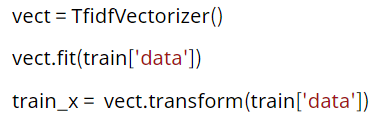
- 이때 transform과 pandas의 DataFrame에서의 transform은 의미가 다름
  - 첨부된 사진에서긔 transform은 CountVectorizer라는 모델에 속해있는 메서드?만의 고유기능(데이터를 feature 벡터화 변환수행해주는 기능)을 수행함
  - 뭐 어쨌든 data를 원하는 형식으로 변경한다는 데엔 동일 맥락이겠지만, pandas DataFrame의 transform은 함수 여러개를 적용시킬 수 있지만 첨부된 사진에서의 transform은 해당 모델을 만든 사람이 만든 고유의 기능임, 벡터화를 수행시켜주는.. 
  - 아무튼 (동명이인 느낌)